In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r'/content/summer_camp_data - summer_camp_data.csv.csv')

In [3]:
#Обзор данных
display(df.head(10))
print()
display(df.info())
print()
display(df.isna().sum())
print()
display(df.duplicated().sum())

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0
5,2020-05-11,yandex,cpc,Не определено,Десктоп,no,no,2775,1441,5990,1196,549,76,90862.0
6,2020-05-11,yandex,organic,Не определено,Мобайл,no,no,3116,1395,4950,990,703,112,111012.0
7,2020-05-11,yandex,cpc,Не определено,Мобайл,no,no,3854,1842,7310,1462,913,150,168397.0
8,2020-05-11,yandex,cpc,Не определено,Десктоп,yes,no,2816,510,8450,1688,949,170,187452.0
9,2020-05-11,(direct),(none),Не определено,Десктоп,yes,no,1184,324,2710,542,269,54,67849.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52724 entries, 0 to 52723
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                52724 non-null  object 
 1   source              52724 non-null  object 
 2   medium              52724 non-null  object 
 3   delivery_available  52724 non-null  object 
 4   device_type         52724 non-null  object 
 5   promo_activated     52724 non-null  object 
 6   filter_used         52724 non-null  object 
 7   pageviews           52724 non-null  int64  
 8   visits              52724 non-null  int64  
 9   productClick        52724 non-null  int64  
 10  addToCart           52724 non-null  int64  
 11  checkout            52724 non-null  int64  
 12  transactions        52724 non-null  int64  
 13  revenue             52724 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 5.6+ MB


None

date                  0
source                0
medium                0
delivery_available    0
device_type           0
promo_activated       0
filter_used           0
pageviews             0
visits                0
productClick          0
addToCart             0
checkout              0
transactions          0
revenue               0
dtype: int64

0

Очень чистый датасэт на первый взгляд. Ни пропусков, ни дубликатов. Только надо поменять формат даты

In [4]:
#смена формата 
df = df.astype({'date': 'datetime64[ns]'})

In [5]:
df.describe()

,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
count,52724.000000,52724.000000,52724.000000,52724.00000,52724.000000,52724.000000,5.272400e+04
mean,445.797853,127.219312,891.086981,178.04074,146.593620,20.092823,2.419841e+04
std,1108.633081,385.094298,2101.027285,419.99282,344.664158,52.436046,6.382118e+04
min,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00
25%,12.000000,2.000000,20.000000,4.00000,3.000000,0.000000,0.000000e+00
50%,47.000000,7.000000,90.000000,18.00000,15.000000,2.000000,2.445500e+03
75%,256.000000,41.000000,520.000000,104.00000,83.000000,11.000000,1.329775e+04
max,26589.000000,6975.000000,32460.000000,6486.00000,3857.000000,1113.000000,1.397420e+06


Судя по максимальным значениям, стандартным отклонениям и разнице между средним и медианой, в каждом столбце с числовыми данными есть выбросы

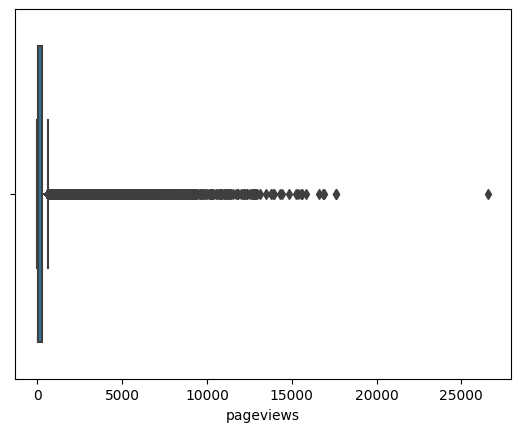

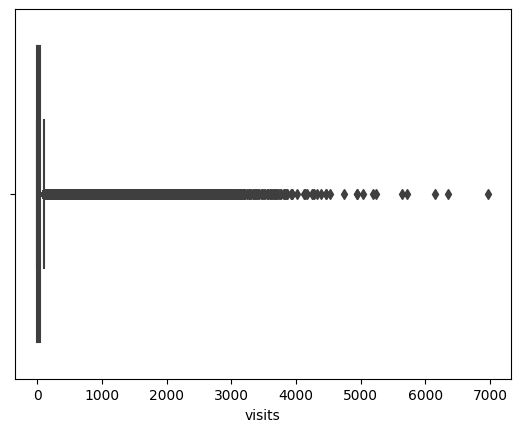

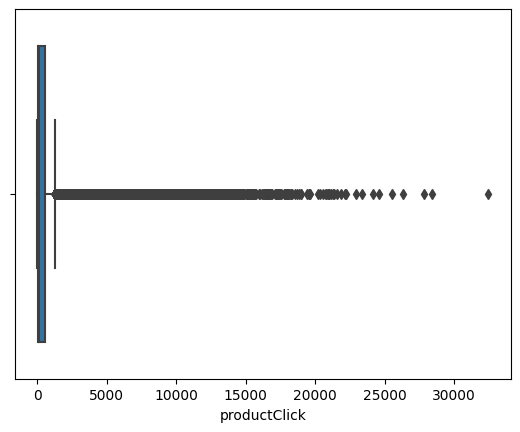

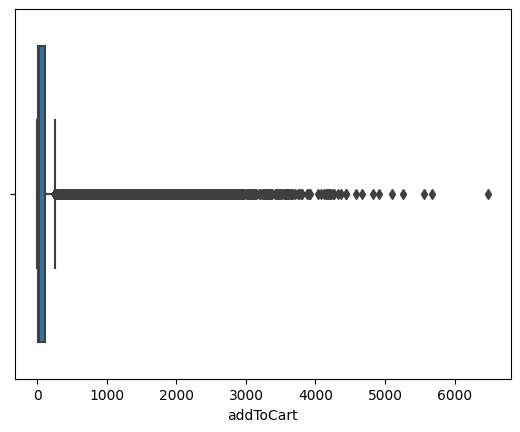

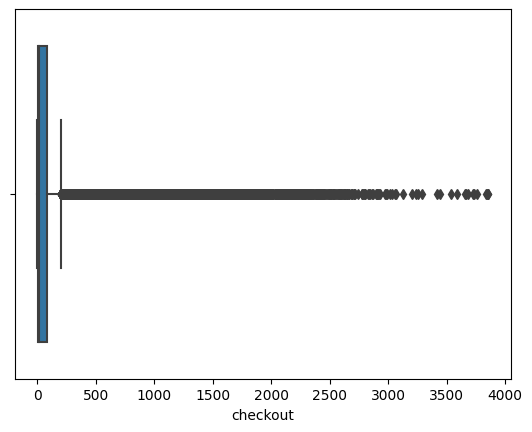

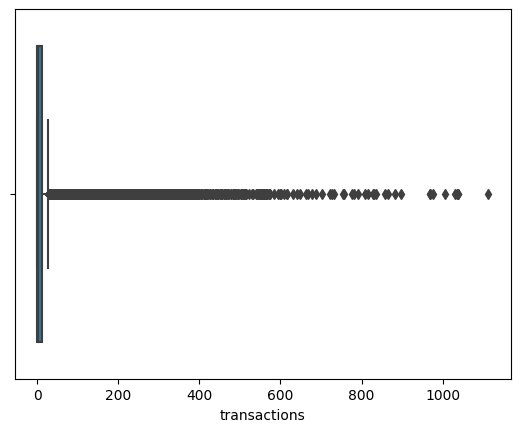

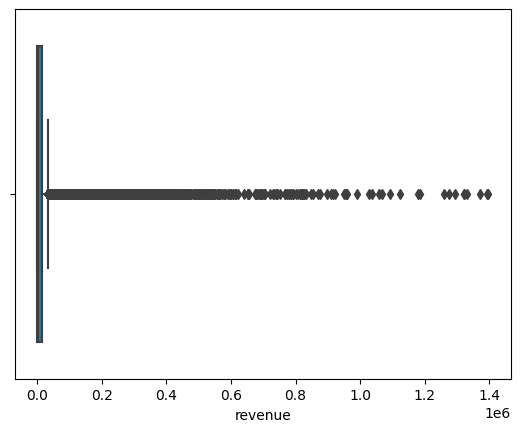

In [6]:
# boxplot
for i in df.columns: 
  try:
    sns.boxplot(x=df[i])
    plt.show()
  except: 
    continue

Судя по боксплоту выбросов очень много 

In [7]:
#Удаление выбросов, за выброс считаю значения с z-score больше 3, при удалении выбросов по всему датасэту 
#удаляется слишком много строк, поэтому удалю из целевых значений.   
for i in ['visit', 'transactions', 'revenue']: 
  df = df[(np.abs(stats.zscore(df['revenue'])) < 3)]
df.describe()

,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
count,48165.000000,48165.000000,48165.000000,48165.000000,48165.000000,48165.000000,48165.000000
mean,220.682840,61.953991,387.930032,77.449891,69.278958,7.768047,9216.563584
std,611.909046,221.980431,823.681898,164.531466,167.355327,14.836305,17428.171729
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,2.000000,10.000000,2.000000,3.000000,0.000000,0.000000
50%,37.000000,6.000000,70.000000,14.000000,12.000000,2.000000,1885.000000
75%,154.000000,26.000000,330.000000,66.000000,53.000000,7.000000,7919.000000
max,13465.000000,6152.000000,10170.000000,2028.000000,2234.000000,107.000000,88424.000000


## Какой рекламный канал принёс больше всего дохода за всё время? 

In [8]:
#за какое такое время 
print(df['date'].dt.year.value_counts())
print(df['date'].dt.month.value_counts())

2020    48165
Name: date, dtype: int64
9    5730
5    5674
6    5621
8    5576
4    5427
7    5417
3    5061
2    4904
1    4755
Name: date, dtype: int64


Данные за январь-сентябрь 2020 года. Количество данных по месяцам отличается несильно 

In [9]:
# Какие ресурсы?
df['source'].value_counts()

yandex           9981
google           9854
(direct)         4557
admitad          4019
eLama            3415
cityads          2923
other            2460
newsletter       1680
vk               1425
promo            1173
DuckDuckGo       1135
facebook         1026
co-promo          946
bing              811
actionpay         763
opmcpa            545
mytarget          540
advertise         327
instagram         301
yandex_direct     109
youtube            88
sailplay           49
baidu              19
exponea            19
Name: source, dtype: int64

In [10]:
# Что лежит в колонке медиум 
df['medium'].value_counts()

cpc        15114
organic    13353
cpa         8736
(none)      4557
email       3993
social      2412
Name: medium, dtype: int64

В медиум тип  оплаты интернет-рекламы

In [11]:
df[df['source'] == 'yandex']['medium'].value_counts()

organic    5057
cpc        4924
Name: medium, dtype: int64

Не понятно, что за (direct).  
Два предположения:  
1. Яндекс директ. 
Но непонятно, почему тогда к яндексу относятся 3 ресурса из всего датасэта:  
сам яндекс, причем в medium отмечен как органичнеский, так и платный трафик (medium = CPC, вроде как тоже яндекс директ), яндекс директ и просто (директ) 
2. Что кажется более вероятным, это прямой трафик, например, по сарафанному радио.  

Трогать этот direct не буду, он занимает довольно большой объем, надо будет запросить больше информации у источника датасэта  


In [12]:
#Присоединю яндекс_директ к яндексу
df['source'] = df['source'].replace('yandex_direct', 'yandex')

df['source'].value_counts()

yandex        10090
google         9854
(direct)       4557
admitad        4019
eLama          3415
cityads        2923
other          2460
newsletter     1680
vk             1425
promo          1173
DuckDuckGo     1135
facebook       1026
co-promo        946
bing            811
actionpay       763
opmcpa          545
mytarget        540
advertise       327
instagram       301
youtube          88
sailplay         49
baidu            19
exponea          19
Name: source, dtype: int64


Топ инсточников:  
yandex        10090  
google         9854  
(direct)       4557  
admitad        4019  
eLama          3415  
cityads        2923  
other          2460  
newsletter     1680  
vk             1425  
promo          1173  
DuckDuckGo     1135  
facebook       1026  

Еще интересно, что входит в колонку другие, тоже довольно большой объем датасэта занимает. 

In [13]:
df[df['source'] == '(direct)']['medium'].value_counts()

(none)    4557
Name: medium, dtype: int64

В медиум у директа ничего нет. Странный ресурс 

,source,revenue
0,yandex,146421793.0
1,google,139916839.0
2,(direct),68025392.0
3,admitad,42427943.0
4,eLama,16432390.0
5,cityads,14290767.0
6,promo,4841333.0
7,co-promo,3347826.0
8,newsletter,2225289.0
9,other,1839654.0


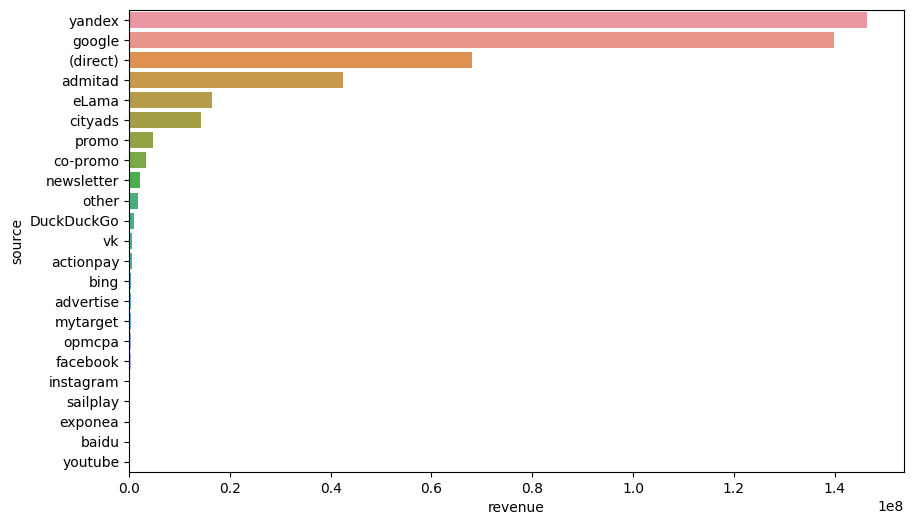

In [14]:
#Сравнение каналов по объему выручки за все время
compare = pd.pivot_table(df, values='revenue', index=['source'], aggfunc='sum').sort_values(by='revenue', ascending=False).reset_index()
display(compare)

plt.figure(figsize=(10, 6))
sns.barplot(data=compare, x='revenue', y = 'source')
plt.show()

In [15]:
#Детализация яндекса 
print("cpc:", df.query('source == "yandex" & medium == "cpc"')['revenue'].sum())
print("organic", df.query('source == "yandex" & medium == "organic"')['revenue'].sum())

cpc: 66354848.0
organic 80066945.0


**Больше всего дохода за все время принес яндекс, причем больше половины органический трафик**

,source,addToCart,checkout,pageviews,productClick,transactions,visits
0,google,36,28.0,81,180,4,11
1,(direct),40,31.0,77,200,4,10
2,yandex,32,26.0,71,160,3,11
3,admitad,18,18.0,44,90,2,7
4,cityads,8,9.0,41,40,1,5
5,co-promo,14,14.0,37,70,1,4
6,eLama,16,14.0,32,80,2,4
7,promo,10,8.0,20,50,1,3
8,newsletter,6,6.0,17,30,1,4
9,facebook,4,2.0,16,20,0,5


<Figure size 1000x600 with 0 Axes>

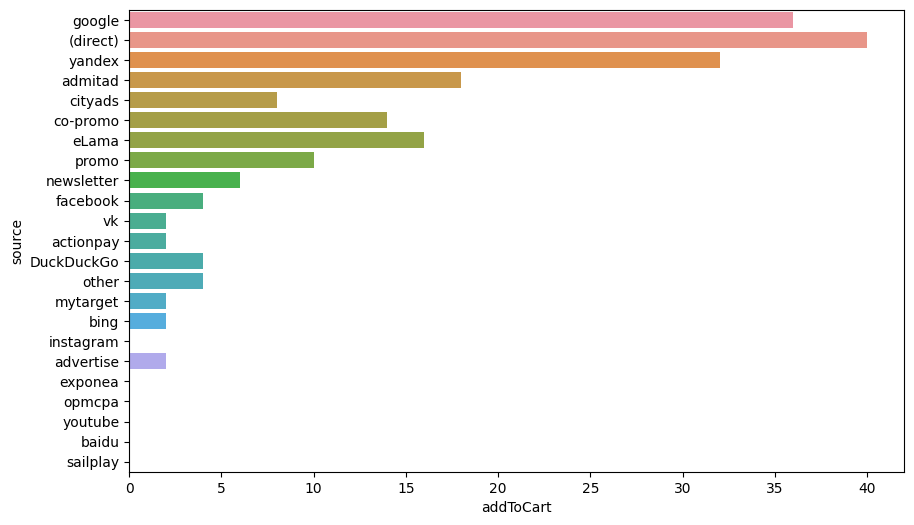

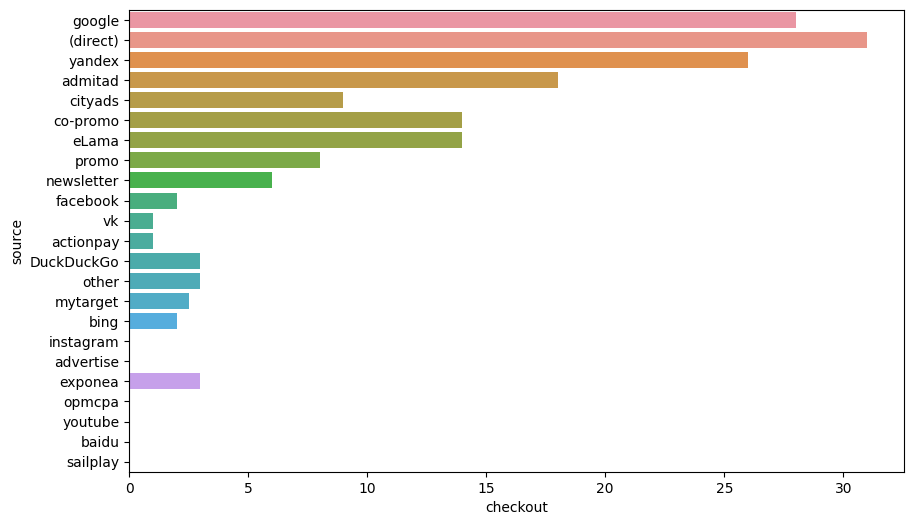

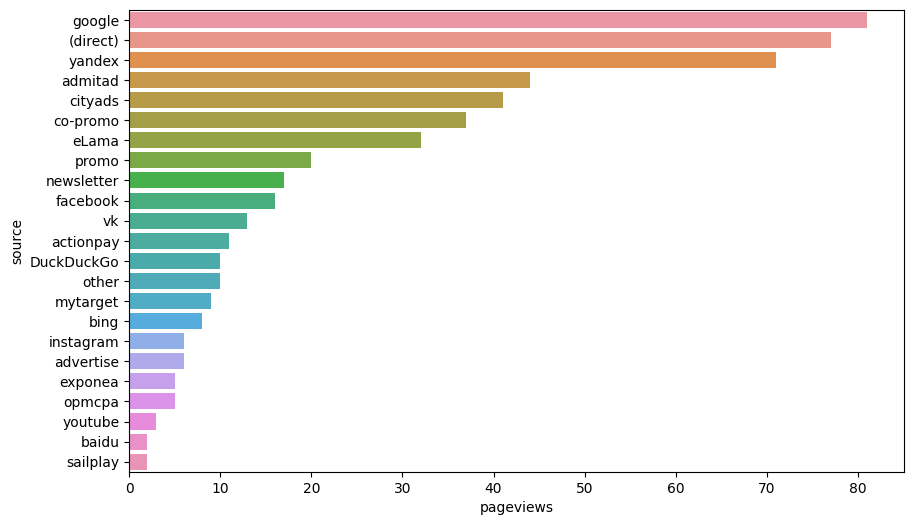

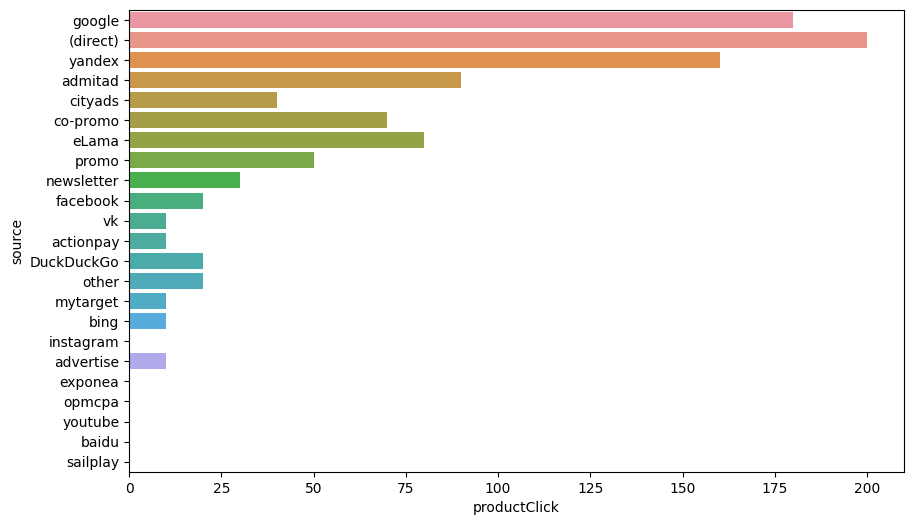

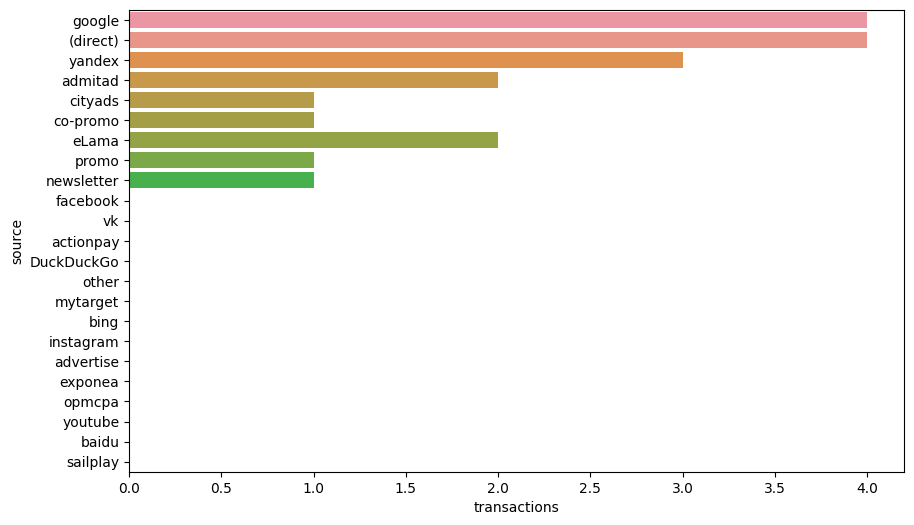

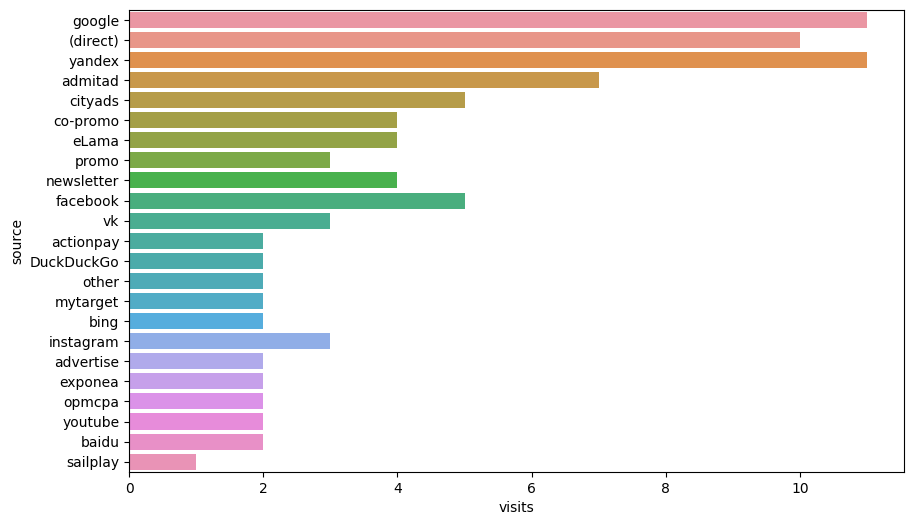

In [16]:
# Сравнение каналов по всем остальным параметрам, из-за выбросов смотрю медиану.
compare_2 = pd.pivot_table(df, index = 'source', values=['pageviews', 'visits',	'productClick',	'addToCart',	'checkout',	'transactions'], 
                           aggfunc = "median").sort_values(by='pageviews', ascending = False).reset_index() 
display(compare_2)                           
for i in compare_2.columns:
  plt.figure(figsize=(10, 6))
  if i != 'source':
    sns.barplot(data = compare_2, x = i, y='source')
  plt.show()                                                     

С детализацией стало еще более интересно, что такое директ, с него больше всего кликов, добавлений в корзину, рссчетов   
В целом, первые строки занимают топ-12 ресурсов, что логично, тк это почти весь обхем датасэта.  
Большинство каналов привлечения бесполнезны с точки зрения транзакционной ценности: визиты есть - покупок нет 

In [17]:
df.groupby('source')['transactions'].agg(['median', 'count',  'mean', 'max']).sort_values(by='median', ascending=False)

,median,count,mean,max
source,,,,
(direct),4.0,4557,12.878429,88
google,4.0,9854,11.975441,106
yandex,3.0,10090,12.012190,107
admitad,2.0,4019,9.051257,79
eLama,2.0,3415,4.242460,51
promo,1.0,1173,3.377664,74
cityads,1.0,2923,4.072528,50
co-promo,1.0,946,2.689218,31
newsletter,1.0,1680,1.163690,12


Да, из директа как будто бы приходят более лояльные клиенты, по количеству их меньше. а медиана транзакций самая большая

## b. Как изменился средний чек транзакции после введения коронавирусных ограничений? 

In [18]:
#Добавлю колонки с месяцем и средним чеком  
df['month'] = df['date'].dt.month
df['avg_bill'] = (df['revenue'] / df['transactions']).round(2)
df.head()

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,month,avg_bill
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0,5,962.77
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0,5,1112.72
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0,5,997.76
9,2020-05-11,(direct),(none),Не определено,Десктоп,yes,no,1184,324,2710,542,269,54,67849.0,5,1256.46
10,2020-05-11,admitad,cpa,Не определено,Десктоп,no,no,1401,677,320,64,36,6,7477.0,5,1246.17


In [19]:
#Сводная таблица с выручкой и средним чеком по месяцам. Дата старта ковидных органичений в Москве 05.03.2020
avg_bill_month  = pd.pivot_table(data = df, index='month', values=['avg_bill', 'revenue'], aggfunc='mean')
avg_bill_month

,avg_bill,revenue
month,,
1,1247.580666,8583.011146
2,1303.297624,8688.835440
3,1232.723148,8927.366726
4,1111.763147,8722.382532
5,1153.248260,8867.237222
6,1167.356547,9313.699520
7,1226.087439,10328.904006
8,1219.203726,10417.593615
9,1231.605027,8947.741885


В марте упала выручка и средний чек. После марта выручка продолжала падать, а средний чек постепенно начал возвращаться к начальным цифрам 

In [20]:
#Сводная таблица зависимость среднего чека от канала и месяца 
temp = pd.pivot_table(data=df, index='month', columns='source', values='avg_bill').reset_index()
temp

source,month,(direct),DuckDuckGo,actionpay,admitad,advertise,bing,cityads,co-promo,eLama,exponea,facebook,google,instagram,mytarget,newsletter,opmcpa,other,promo,sailplay,vk,yandex
0,1,1301.284926,1214.974308,1281.100000,1153.589496,1141.963804,1214.222222,1073.878028,NaN,1192.693298,NaN,1246.350000,1275.990346,NaN,835.000000,1104.821579,1126.400505,1309.385313,NaN,896.00,1090.976053,1271.922661
1,2,1280.564803,1778.673077,1308.122022,1274.054233,1046.823529,1268.907407,1301.273226,NaN,1229.404687,NaN,1235.848966,1293.956974,NaN,824.000000,1354.002982,1090.579516,1545.092784,NaN,729.00,1089.622188,1327.920643
2,3,1173.882577,1925.491525,1162.373924,1225.683198,1255.214286,1482.800000,1259.449610,NaN,1263.512607,NaN,925.140000,1213.196899,NaN,NaN,1043.099014,1105.740000,1212.331765,NaN,1887.00,1040.598923,1262.821016
3,4,1146.166010,1082.890145,1053.359375,1061.283743,1247.000000,1018.041667,1114.105680,NaN,1142.669907,NaN,992.065217,1112.427852,1115.666667,698.000000,921.717386,1256.369565,1069.304141,1212.532881,1997.50,993.835227,1137.648250
4,5,1178.103007,1177.830615,958.000000,1097.907822,1470.166667,983.451613,1108.574828,NaN,1121.511026,NaN,1088.728605,1147.930326,982.000000,731.000000,1052.031081,1505.000000,1137.429247,1263.998915,1156.25,1125.538421,1182.585238
5,6,1169.883911,1212.377049,1133.653200,1113.354175,1030.750000,1224.082063,1144.086643,1112.200000,1145.027042,NaN,903.197368,1170.200219,NaN,NaN,1093.156908,1476.000000,1104.663714,1280.723098,NaN,1027.650000,1208.174872
6,7,1183.286704,1174.660377,1103.728261,1139.233796,800.000000,1310.660714,1190.419223,1299.193702,1206.335476,NaN,1420.400000,1245.273913,1152.000000,NaN,1289.768077,1136.500000,1219.120309,1289.058780,809.00,676.727273,1258.320284
7,8,1238.917611,1123.175926,1329.450000,1180.788123,1527.000000,1478.525000,1178.627456,1335.089799,1119.115223,1760.8,1445.000000,1220.515464,1249.750000,1375.142857,1169.376760,1058.000000,1182.132576,1137.695946,NaN,877.666667,1247.306894
8,9,1202.391943,1391.113651,1258.541667,1157.715014,NaN,1416.926471,1225.716039,1395.447149,1168.011616,NaN,734.000000,1224.772470,1199.500000,1294.812372,1098.930286,1198.000000,1151.556096,1169.009706,NaN,926.909091,1265.563559


Не все каналы работали одинаковое количество времени.  
Например, для advertise нет данных за сентябрь, а по ко-промо с января по апрель  
По Exponea есть данные только за август, со средним чеком выше, чем у всех остальных. Но у этого канала всего 19 записей по всему датасэту, этот канал можно вообще не учитывать. 
По mytarget тоже несильно много данных, меньше 1000 строк, средние чеки с этого канала гораздо ниже, чем со всех остальных.  
Промоакция была запущена в апреле. Связано ли это с промокодами? 

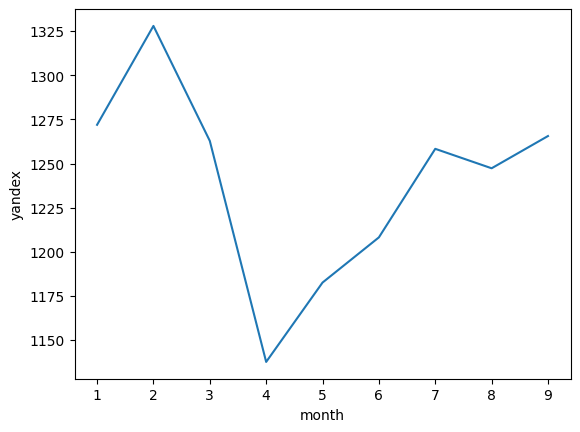

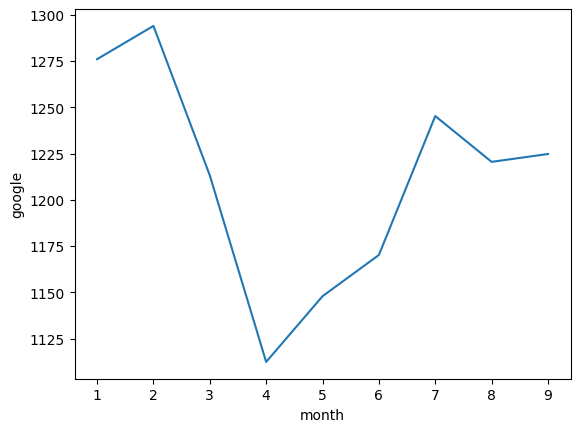

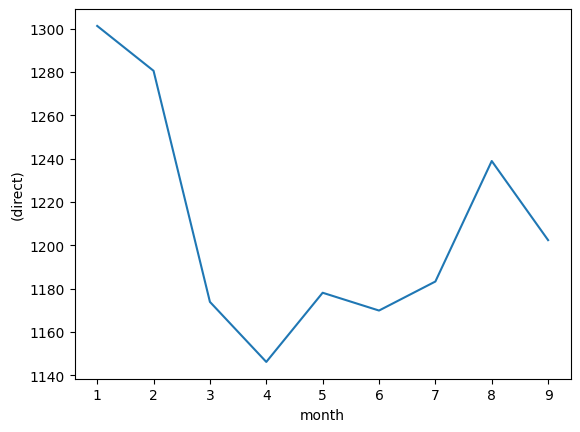

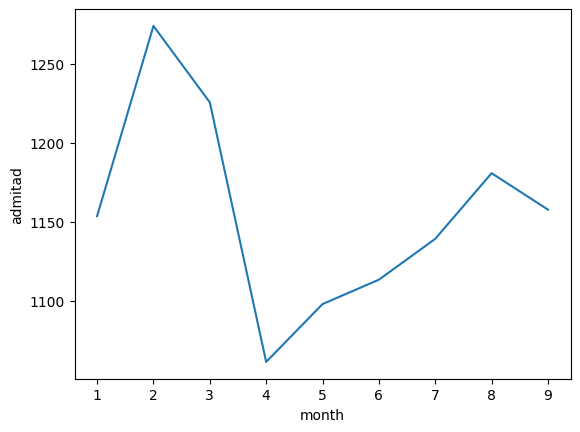

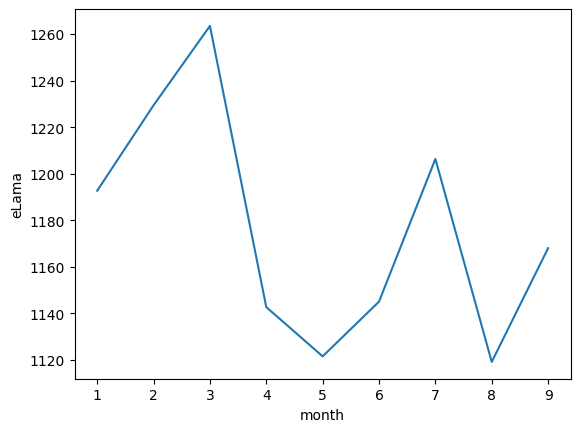

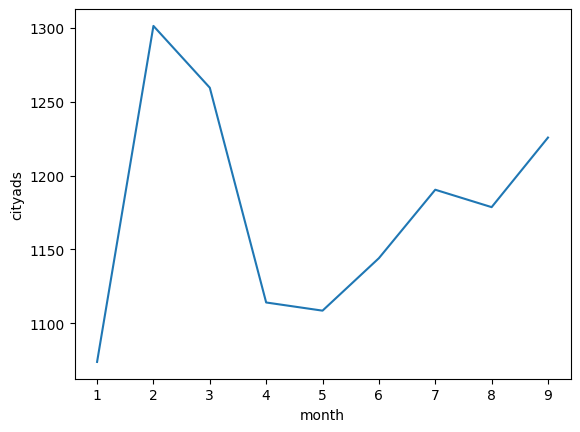

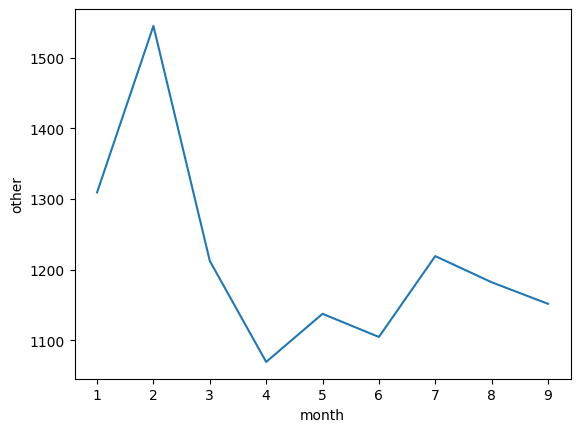

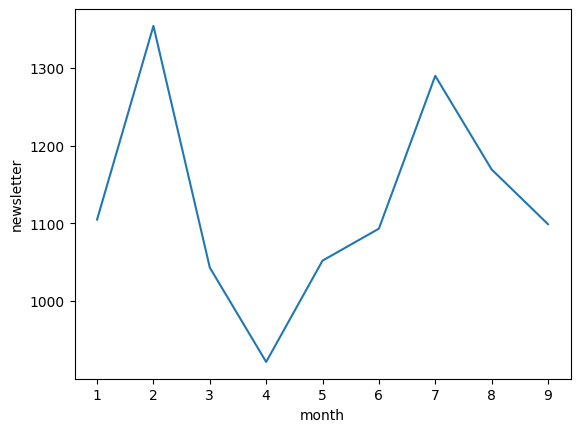

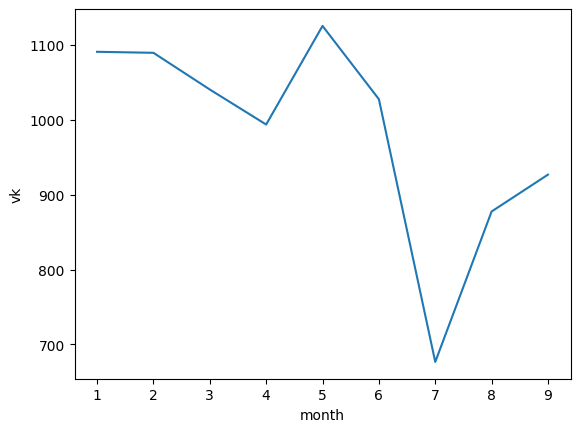

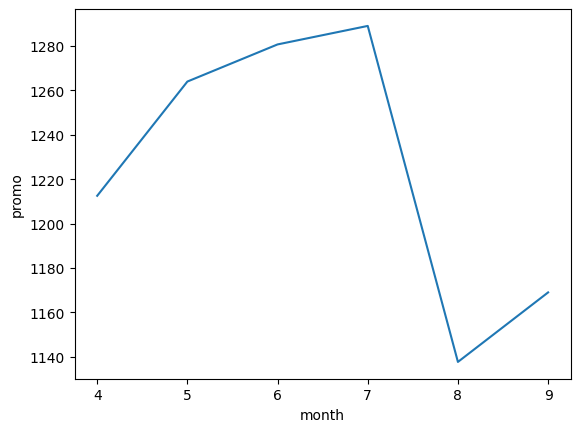

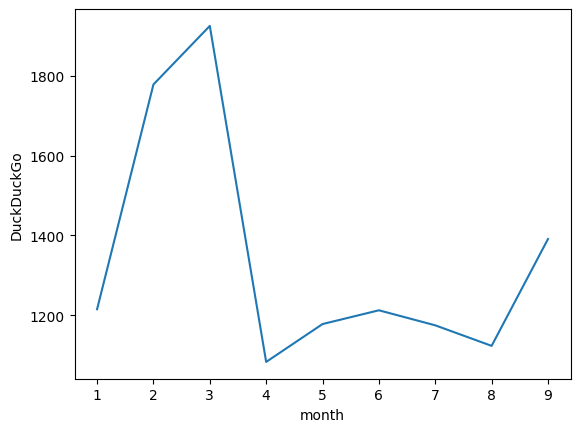

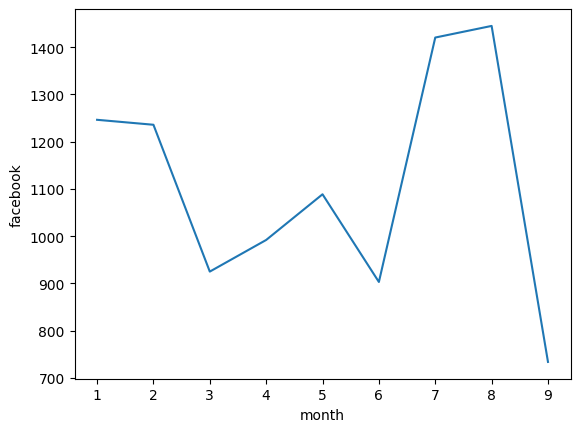

In [21]:
#Детализация для источников, у которых более 1000 строк  

top_12 = ['yandex', 'google', '(direct)', 'admitad', 'eLama', 'cityads', 
          'other', 'newsletter', 'vk', 'promo', 'DuckDuckGo', 'facebook']
for i in top_12: 
    sns.lineplot(data=temp, x=temp['month'], y=i)
    plt.show()

Почти для всех каналов привлечения клиентов был резкий спад в апреле 2020, в москве старт ковидных ограничений - март 2020 -> средний чек снизился.  
Видимо, промоакция, начатая в апреле, связана с этим. 

In [22]:
#Разница в среднем чеке межде месяцами 
avg_bill_month['diff_percent'] = avg_bill_month['avg_bill']/avg_bill_month['avg_bill'].shift(1, fill_value=0)
avg_bill_month

,avg_bill,revenue,diff_percent
month,,,
1,1247.580666,8583.011146,inf
2,1303.297624,8688.835440,1.044660
3,1232.723148,8927.366726,0.945849
4,1111.763147,8722.382532,0.901876
5,1153.248260,8867.237222,1.037315
6,1167.356547,9313.699520,1.012234
7,1226.087439,10328.904006,1.050311
8,1219.203726,10417.593615,0.994386
9,1231.605027,8947.741885,1.010172


В апреле средний чек снизился на 12% по отношению к марту.  
**После введения ковидных ограничений средний чек снизился на 12%**

## Как средний чек изменился для пользователей, покупающих с промокодом и без? (параметр «promo_activated»)

,promo_activated,avg_bill
0,no,1086.36
1,yes,1152.69


<Axes: xlabel='promo_activated', ylabel='avg_bill'>

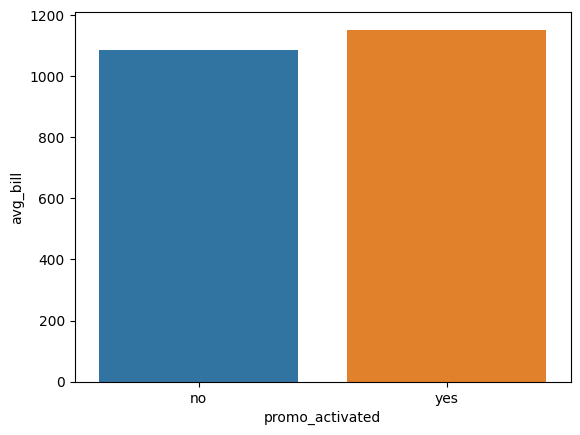

In [23]:
#Сравнение среднего чека с промокодом и без 

promo = pd.pivot_table(data=df, index = 'promo_activated', values='avg_bill', aggfunc = "median").reset_index()
display(promo)
sns.barplot(data=promo, x='promo_activated', y='avg_bill')


In [24]:
#Разница между средним чеком с промокодом и без в процентах
print(promo['avg_bill'][1]/promo['avg_bill'][0])

1.0610571081409477


**Средний чек при применении промокода незначительно увеличился (на 6 %)** 

## c. Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни?

In [25]:
#Колонка с днем недели и CR 
df['weekday'] = df['date'].dt.weekday + 1
df['CR'] = df['transactions']/df['visits'] * 100 
df.head()

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,month,avg_bill,weekday,CR
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0,5,962.77,1,7.299270
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0,5,1112.72,1,8.313817
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0,5,997.76,1,6.200000
9,2020-05-11,(direct),(none),Не определено,Десктоп,yes,no,1184,324,2710,542,269,54,67849.0,5,1256.46,1,16.666667
10,2020-05-11,admitad,cpa,Не определено,Десктоп,no,no,1401,677,320,64,36,6,7477.0,5,1246.17,1,0.886263


In [26]:
# Немного подчищу выбросы 
df = df[(np.abs(stats.zscore(df['CR'])) < 3)]

In [27]:
df.groupby('weekday')['CR'].agg(['median', 'mean', 'min', 'max', 'std', 'count'])

,median,mean,min,max,std,count
weekday,,,,,,
1,20.547945,36.220215,0.0,150.000000,38.411826,6735
2,20.638945,36.557952,0.0,153.846154,38.579032,6706
3,22.222222,36.766188,0.0,153.333333,38.316024,6841
4,24.000000,37.489123,0.0,150.000000,38.448864,6704
5,27.906977,39.449795,0.0,150.000000,38.582450,7117
6,30.000000,40.697142,0.0,150.000000,38.661554,7060
7,27.272727,39.588505,0.0,150.000000,38.671289,6921


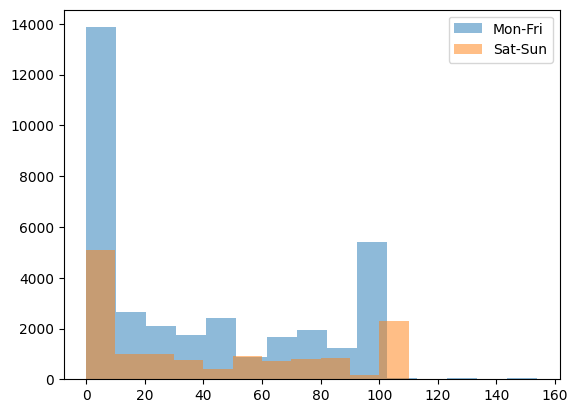

In [28]:
#Сравню частотные гистограммы
plt.hist(df.query('weekday <= 5')['CR'], bins=15, alpha=0.5, label='Mon-Fri')
plt.hist(df.query('weekday > 5')['CR'], bins=15, alpha=0.5, label='Sat-Sun')
plt.legend(loc='upper right')

Судя по статистике, медиана с средняя увеличиваются с пятниц по воскресенье. Стандартные отклонения почти одинаковые. Графики распределены чуть по-разному, конверсия в вызодные чуть повыше.   
Для сравнения двух выборок буду использовать Т-тест, тк выборки довольно большого размера.  
equal_var = False, тк выборки разного размера.   
критический уровень статистической значимости = 0.05 


In [29]:
mon_fri = df.query('weekday <= 5')['CR'] 
sat_sun = df.query('weekday > 5')['CR'] 
alpha = 0.05
results = stats.ttest_ind(mon_fri, sat_sun, equal_var = False)
print(results.pvalue)

3.0814527978826953e-13


**p-value гораздо меньше 5% (3*10^-13), значит можно сказать, с 95% вероятностью конверсия в будние и в вызодные отличается.** 

## d. Вам необходимо спрогнозировать объем дохода, полученного с пользователей, приведенных на сайт контекстной рекламой (medium = cpc) на полгода вперед.Опишите, как бы вы подошли к этой задаче и какие дополнительные данные вам понадобятся?

Первое что бы сделала, это запросила данные за прошлые годы.  
- Самое простое, что можно было бы предположить, что завтра будет как вчера.
- Отрисовала бы графики 
- Декомпозировала бы данные, посмотрела на сезонность. 
- Разбила бы данные на тренировочный и тестовый датасэт (главное, чтобы не было подглядывания), обучила бы модель (например fb Prophet) 
- Анализировала полученные данные 

## Выводы 
1. *Какой рекламный канал принёс больше всего дохода за всё время?*  
Яндекс, больше всего с органического трафика  

2. *Как изменился средний чек транзакции после введения коронавирусных ограничений?*  
Введение ковидных ограничений в Москве март 2020.  
Если сравнивать средний чек в марте и апреле, то в апреле будет снижение в 12% 


3. *Как средний чек изменился для пользователей, покупающих с промокодом и без? (параметр «promo_activated»)*  
Если сравнивать медианы средних чеков с промокодами и без, то средний чек с промокодом выше на 6% 

4. *Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни?*
По результатам Т-теста p-value получился 3*10^-13, поэтому с вероятностью 95% можно утверждать, что конверсия в выходные и будние дни отличается 

5. *Вам необходимо спрогнозировать объем дохода, полученного с пользователей, приведенных на сайт контекстной рекламой (medium = cpc) на полгода вперед.Опишите, как бы вы подошли к этой задаче и какие дополнительные данные вам понадобятся?* 
Основное, что необходимо для прогнозирования временных рядов, это данные за прошлое время. Чем боьлше данных, тем лучше. Больше данных богу данных!!!!  
